## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [12]:
x, y = mnist['data'], mnist['target']

In [16]:
x.shape            # x[0] 

(70000, 784)

In [17]:
y.shape

(70000,)

In [18]:
%matplotlib inline

In [24]:
import matplotlib
import matplotlib.pyplot as plt

In [31]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28) # Lets reshape it to plot it

In [32]:
some_digit_image.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

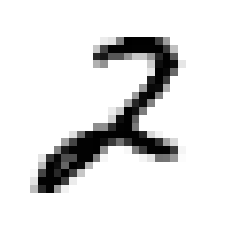

In [34]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')

In [37]:
y[36001]

'2'

In [38]:
x_train, x_test = x[:60000], x[60000:]

In [39]:
y_train, y_test = y[:60000], y[60000:]

In [41]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating 2 detector

In [50]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [58]:
y_train

array([3, 1, 7, ..., 9, 6, 2], dtype=int8)

In [59]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [60]:
from sklearn.linear_model import LogisticRegression

In [87]:
clf = LogisticRegression()

In [88]:
clf.fit(x_train, y_train_2)

/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
clf.predict([some_digit])

array([ True])

In [79]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv = 3, scoring="accuracy")

/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [72]:
a.mean()

0.9779499999999999

## Quiz

Create a classifier which will classfy a digit always as "not 2"
For skewed dataset, its not good